In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt
from astropy    import units  as u

from common import hallmark as hm
from common import io_ipole as io
from common import viz

In [2]:
pf = hm.ParaFrame(
    'test/ipole_86GHz/{mag}a{aspin:g}_w{window:d}/img_s{snapshot:d}_Rh{Rhigh:d}_i{inc:d}.h5'
)

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

Rhigh [  1  10  40 160]
inc [10 30 50 70]
mag ['M']
window [1]
snapshot [1000]
aspin [0.]


In [3]:
sel = pf(inc=70)
display(sel)

,path,mag,aspin,window,snapshot,Rhigh,inc
3,test/ipole_86GHz/Ma0_w1/img_s01000_Rh10_i70.h5,M,0.0,1,1000,10,70
7,test/ipole_86GHz/Ma0_w1/img_s01000_Rh160_i70.h5,M,0.0,1,1000,160,70
11,test/ipole_86GHz/Ma0_w1/img_s01000_Rh1_i70.h5,M,0.0,1,1000,1,70
15,test/ipole_86GHz/Ma0_w1/img_s01000_Rh40_i70.h5,M,0.0,1,1000,40,70


In [4]:
imgs = io.load_mov(sel.path)
meta = imgs.meta

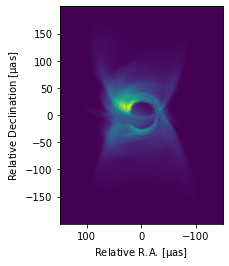

In [5]:
ax = viz.show(imgs, s=0)

In [6]:
display(meta.mass, meta.dist, meta.freq)
display(meta.time, meta.width, meta.height)

<Quantity 4141166.64059526 solMass>

<Quantity 8127.00110226 pc>

<Quantity 86. GHz>

<Quantity [5000.00336439, 5000.00336439, 5000.00336439, 5000.00336439] M>

<Quantity 59.64631839 M>

<Quantity 79.52842452 M>

In [7]:
display(meta.width.to(u.uas, meta.geom),
        meta.height.to(u.uas, meta.geom))

<Quantity 299.9997182 uas>

<Quantity 399.99962426 uas>